<a href="https://colab.research.google.com/github/Rabbia-Ijaz/TryItOut/blob/main/boxGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import zipfile
import glob
import pandas as pd
import  copy
import pickle

Extracting Data set

In [2]:
Zip = zipfile.ZipFile('drive/My Drive/DATA.zip','r')
Zip.extractall('/img')
Zip.close()

BOUNDING BOX FOR COLLARS

In [3]:
#Reading image files and its corresponding bounding box coordinates for training
imgArr = []
collar_csv_file = pd.read_csv("/img/DATA/collarTrainSet.csv")
for p in collar_csv_file['edge_imgPath']:
  imgArr.append(cv.imread("/img/DATA/Collar/target/"+p[19:]).flatten())

Y = [collar_csv_file['bbox_x1'].to_list(),collar_csv_file['bbox_y1'].to_list(),
     collar_csv_file['bbox_x2'].to_list(),collar_csv_file['bbox_y2'].to_list() ]

Y = np.array(Y)
Y = np.transpose(Y)

In [ ]:
#Training on 5000 images
dtr = tree.DecisionTreeRegressor()
dtr.fit(imgArr[:5000], Y[:5000])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [4]:
#A utility function to display bounding box 
def plotBox(points):
  plt.plot([points[0],points[2]] , [points[1],points[1]])
  plt.plot([points[2],points[2]] , [points[1],points[3]])
  plt.plot([points[2],points[0]] , [points[3],points[3]])
  plt.plot([points[0],points[0]] , [points[3],points[1]])

In [ ]:
'''file = open("model2.pkl",'wb')
model = pickle.dump(dtr,file)'''
#Saving the model so there is no need to train on each excecution

Enter: 6214


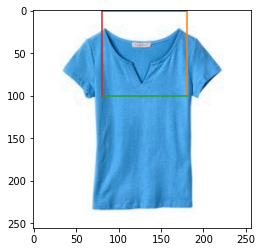

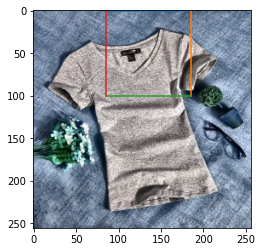

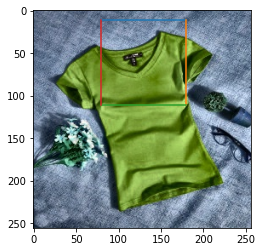

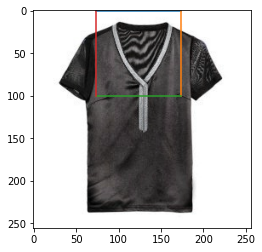

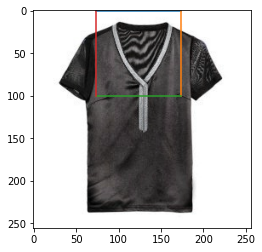

In [5]:
#Loading the saved Model
x = open("/content/sample_data/model2.pkl",'rb')
model = pickle.load(x)
x.close()

num = input("Enter: ")
num = int(num)
pred = model.predict(imgArr[num:num+5])
for i in range(num,num+5):
  plt.imshow(imgArr[i].reshape(256,256,3))
  plotBox(pred[i-num])
  plt.show()


BOUNDING BOX FOR SLEEVES

In [6]:
#Reading Cropped Images
croppedImgs = []
sleeve_csv_file = pd.read_csv("/img/DATA/sleeveTrainSet.csv")
for p in sleeve_csv_file['edge_path']:
  croppedImgs.append(cv.imread("/img/DATA/Sleeve/crop"+p[17:]))

croppedImgs = np.array(croppedImgs)

[32, 44, 96, 255]


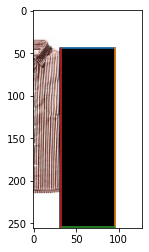

In [7]:
#Utility functions to extract bounding box coordinates from cropped images
def isBlack(arr,i,j):
  if (i < 0 or j<0 or i>=len(arr) or j>=len(arr[0])):
    return False
  else: 
    return arr[i][j][0] == arr[i][j][1] == arr[i][j][2] == 0 

def findCords(img):
  tl = br = True
  tlX = tlY = brX = brY = 0
  for i in range(len(img)):
    if (not tl):
      break
    for j in range(len(img[i])):
      if (tl):
        if (isBlack(img,i,j) and not isBlack(img,i-1,j) and not isBlack(img,i,j-1)):
          tl = False
          tlX = j
          tlY = i
  for i in range(len(img)-1,0,-1):
    if (not br):
      break
    for j in range(len(img[i])-1,0,-1):
      if (br):
        if (isBlack(img,i,j) and not isBlack(img,i,j+1) and not isBlack(img,i+1,j) and isBlack(img,i-1,j) and isBlack(img,i,j-1)):
          br = False
          brX = j
          brY = i
  return [tlX,tlY,brX,brY]

print (findCords(croppedImgs[6][:,len(croppedImgs[6])//2:,:]))
plt.imshow(croppedImgs[6][:,len(croppedImgs[6])//2:,:])
plotBox(findCords(croppedImgs[6][:,len(croppedImgs[6])//2:,:]))
plt.show()

In [ ]:
#Calculating bounding box coordinates for training
'''
labelBoxCords = []
for img in croppedImgs[:5000]:
  lhalf = img[:,:len(img)//2,:]
  rhalf = img[:,len(img)//2:,:]
  lCords = findCords(lhalf)
  rCords = findCords(rhalf)
  rCords[0] += len(img)//2
  rCords[2] += len(img)//2
  labelBoxCords.append(lCords + rCords)'''

#Saving cordinates in a file so no need to re-compute again
'''
cord_file = open("cords.pkl","wb")
pickle.dump(labelBoxCords,cord_file)'''

In [9]:
x = open("/content/sample_data/cords.pkl","rb")
labelBoxCords = pickle.load(x)
x.close()

In [10]:
labelBoxCords = np.array(labelBoxCords)
sleeveImgs = []
for p in sleeve_csv_file['edge_path']:
  sleeveImgs.append(cv.imread("/img/DATA/Sleeve/target"+p[17:]))

sleeveImgs = [x.flatten() for x in sleeveImgs]

In [ ]:
#Training sleeve model
sleeveModel = DecisionTreeRegressor()
sleeveModel.fit(sleeveImgs[:5000],labelBoxCords)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
'''
sleeve_file = open("Sleeve_Model.pkl",'wb')
pickle.dump(sleeveModel,sleeve_file) '''
#Saving the model so there is no need to train on each excecution

In [ ]:
x = open("/content/sample_data/Sleeve_Model.pkl","rb")
sModel = pickle.load(x)
#Loading the saved model

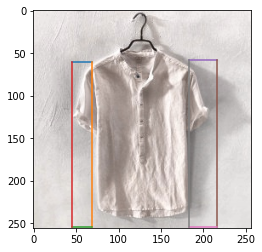

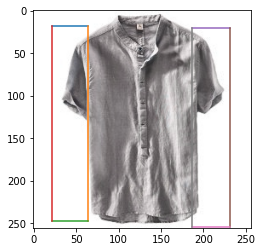

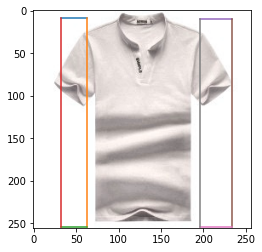

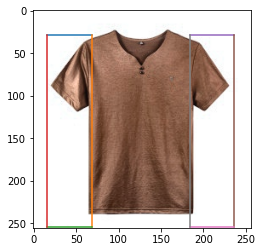

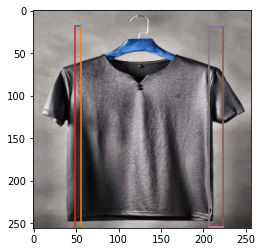

In [ ]:
num = 6524
pred = sModel.predict(imgArr[num:num+5])
for i in range(num,num+5):
  plt.imshow(imgArr[i].reshape(256,256,3))
  plotBox(pred[i-num][:4])
  plotBox(pred[i-num][4:])
  plt.show()